In [45]:
import numpy as np
import pygame
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output

### SARSA

In [113]:
def SARSA(env, alpha=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    
    '''
    num_episodes - кол-во эпизодов для завершения
    eps - значение параметра e-жадной стратегии
    gamma - дисконтирующий множитель
    eps_decay -коэффициент затухания eps
    '''
    
    #Инициализация пространства действий и состояний
    nA = env.action_space.n
    nS = env.observation_space.n

    # Q-матрица, содержащая значений Q-функции для каждой пары состояние-дейсвтие (nS*nA) и списки информации о результатах игры
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []
    
    
    # Главный цикл для обучения Q-функции
    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # Обновление eps до достижения порога в 0.01
        if eps > 0.01:
            eps -= eps_decay

        # Жадный выбор действия, исходя из текущего состояния и и Q-матрицы
        action = eps_greedy(Q, state, eps) 

        # Основной цикл после инициализации первого дейсвтия до завершения эпизода
        while not done:
            
            # Шаг взаимодействия со средой и получение следующего состояния, реварда и прочую инфу
            next_state, rew, done, _ = env.step(action)

            # Выбор следующего действия для SARSA обновления согласно e-жадной стратегии, опираясь на след. состояние и Q-матрицу
            next_action = eps_greedy(Q, next_state, eps) 
            # SARSA обновление по формуле
            Q[state][action] = Q[state][action] + alpha*(rew + gamma*Q[next_state][next_action] - Q[state][action])
            
            # Установка нового состояния и действия, а также прибавление полученного реварда к суммарному
            state = next_state
            action = next_action
            tot_rew += rew
            
            # Если состояние финальное, то весь суммарный ревард отправляется в список games_reward
            if done:
                games_reward.append(tot_rew)
        # Через каждые 300 эпох прогон 1000 тестовых игр и информация о них
        if (ep % 300) == 0:
            test_rew = run_episodes(env, Q, 1000)
            print("Эпизод:{}  Eps:{}  Вознаграждение:{}".format(ep, eps, test_rew))          
            test_rewards.append(test_rew)
            clear_output(True)
            plt.plot(test_rewards)
            plt.show() 

    return Q

In [114]:
def eps_greedy(Q, s, eps=0.1):
    '''
    e-жадная стратегия
    '''
    if np.random.uniform(0,1) < eps:
        # Выбираем рандомное действие
        return np.random.randint(Q.shape[1])
    else:
        # Выбор действия согласно жадной стратегии
        return greedy(Q, s)

In [115]:
def greedy(Q, s):
    '''
    Жадная стратегия. Возвращает индекс для максимального значения Q соотвествующего состояния S
    '''
    return np.argmax(Q[s])

In [116]:
def run_episodes(env, Q, num_episodes=100, to_print=True):
    '''
    Функция, которая прогоняет несколько эпизодов для тестирования стратегии.
    В данном случае осуществляется только жадная стратегия, поскольку при тестирование исследование не нужно.
    '''
    tot_rew = []
    state = env.reset()

    for _ in range(num_episodes):
        done = False
        game_rew = 0

        while not done:
            # Выбор жадного действия
            next_state, rew, done, _ = env.step(greedy(Q, state))

            state = next_state
            game_rew += rew 
            if done:
                state = env.reset()
                tot_rew.append(game_rew)

    if to_print:
        print('Средний счёт: {} из {} игр!'.format(np.mean(tot_rew), num_episodes))       
    return np.mean(tot_rew)

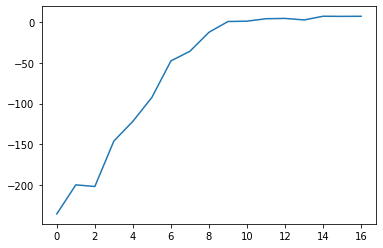

In [117]:
env = gym.make('Taxi-v3')
env.reset()
Q= SARSA(env, alpha=0.1, num_episodes=5000, eps=0.4, gamma=0.95, eps_decay=0.001)

### Q-Learning

In [120]:
def Q_learning(env, alpha=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    #Инициализация пространства действий и состояний
    nA = env.action_space.n
    nS = env.observation_space.n

    # Q-матрица, содержащая значений Q-функции для каждой пары состояние-дейсвтие (nS*nA) и списки информации о результатах игры
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0
        
        # Обновление eps до достижения порога в 0.01
        if eps > 0.01:
            eps -= eps_decay

        while not done:
            action = eps_greedy(Q, state, eps)

            next_state, rew, done, _ = env.step(action)

            # Вычисление максимального значения Q для следующего состояния
            Q[state][action] = Q[state][action] + alpha*(rew + gamma*np.max(Q[next_state]) - Q[state][action])

            state = next_state
            tot_rew += rew
            if done:
                games_reward.append(tot_rew)

        if (ep % 300) == 0:
            test_rew = run_episodes(env, Q, 1000)
            print("Эпизод:{}  Eps:{}  Вознаграждение:{}".format(ep, eps, test_rew))  
            test_rewards.append(test_rew)
            clear_output(True)
            plt.plot(test_rewards)
            plt.show() 
           
    return Q


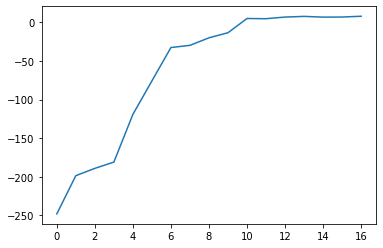

In [121]:
env = gym.make('Taxi-v3')
env.reset()
Q = Q_learning(env, alpha=.1, num_episodes=5000, eps=0.4, gamma=0.95,
eps_decay=0.001)